<a href="https://colab.research.google.com/github/ramandeep05252/Theme-Parks/blob/main/ThemeParks_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Theme Park Sentiment analysis and LDA Modeling
By Ramandeep Kaur




##Table of Content

1. Executive Summary

2. Data Exploration
3. Sentiment Analysis
4. Topic Modeling
5. Practical Implication

<a id = "cell_executivesummary"></a>
# 1. Executive Summary



**Aim:** To clearly articulate the understanding of customer concerns and interests at theme parks, enabling management to enhance visitor satisfaction and optimize park services.

The business problem is to identify and address the specific needs and preferences of theme park visitors from different locations. This project aims to analyze customer reviews to uncover themes and sentiment trends to improve park services, enhance visitor experiences, and drive higher attendance and revenue.

We employed sentiment analysis and Latent Dirichlet Allocation (LDA) modeling to examine customer reviews. Sentiment analysis assessed overall sentiment towards park services, while LDA modeling identified primary topics of concern and interest. Additionally, we analyzed the top 10 visitor groups at each theme park branch and peak visiting times at the California branch.

Our findings indicate that UK visitors focus on logistics, while US visitors prioritize overall experience and attractions. Visitor group analysis revealed geographical preferences, with California attracting Western visitors, Hong Kong drawing regional Asian tourists, and Paris seeing significant European visitors. Peak visiting times show domestic visitors peak in July and October, while international visitors peak in July and December. These insights, detailed in sections "Sentiment Analysis," "Topic Modeling," "Visitor Demographics," and "Peak Visiting Times," provide actionable information for targeted improvements in services, marketing strategies, and visitor engagement initiatives.

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the NLTK toolbox
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from matplotlib import pyplot

## 2. Data Exploration

**Aim:** The aim of data exploration is to gain initial insights and understand patterns within the dataset to inform further analysis.


In this section, we imported the dataset containing reviews of different branches of a theme park into a pandas DataFrame. The dataset is read from a CSV file using the pd.read_csv() function. After loading the dataset, we use df.head() to preview the first five rows.


This preview helps us understand the structure and contents of the dataset, which is essential for subsequent analysis, including sentiment analysis of the reviews.



In [ ]:
#importing dataset
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ADV AI/ThemeParkReviews.csv')
df.head()


Review_ID Year_Month Reviewer_Location  \
0  148524565    2012-12     United States   
1  346403028     2015-3     United States   
2  284580024     2015-6     United States   
3  410306562    2015-12            Canada   
4  358484811     2015-7     United States   

                                                                                                                                                                                               Review_Text  \
0  Loved seeing the Christmas lights at the park, but the crowds were the worst we had ever seen. We have been to Disneyland many times and have experienced long wait times in the past, but this visi...   
1                                                                       I'm not sure reviewing Disneyland even has a point. Always a great day couple of days with the family. My kids love it, of course.   
2  Went to Disneyland for one day. We arrive at opening and left at midnight. We loved all it had to offer. My kids are older so we did not spend time waiting in line to meet characters. Use the fast...   
3  I travelled to Disneyland from Toronto in December 2015 for the very first time. It was EVERYthing that you can imagine. I've dreamed about that day since I was a little girl and was so happy I go...   
4  This place might be ok for families with kids. My wife and I went to remember our past experiences when things were much less expensive. The park is packed with guests and hard to navigate. Prices...   

       Branch  
0  California  
1  California  
2  California  
3  California  
4  California

##Top 10 groups of visitors at each theme park branch according to their location of origin.


The study evaluated and contrasted the leading 10 visitor demographics at each theme park location according to their place of origin.


In California, the majority of visitors were from the United States, followed by Australia, Canada, and the United Kingdom, along with a variety of other nations including New Zealand, India, Mexico, Singapore, the Philippines, and Brazil.


The Hong Kong branch attracted many visitors from Australia and India, in addition to guests from the Philippines, the United States, and neighboring Asian countries such as Singapore, Malaysia, and Indonesia.


Paris experienced the highest visitor numbers from the United Kingdom, followed by the United States and Australia, with significant contributions from other European nations like Ireland, the Netherlands, France, Belgium, and Germany.


The variations in visitor demographics are linked to factors such as geographical closeness, cultural connections, and travel trends in different regions. California tends to draw more tourists from Western nations, while Hong Kong sees a larger influx of regional visitors from Asia, and Paris attracts a considerable number of guests from European countries.


         Branch     Reviewer_Location  Count
100  California         United States  10152
2    California             Australia   2010
11   California                Canada   1511
99   California        United Kingdom    852
61   California           New Zealand    423
38   California                 India    111
57   California                Mexico     86
79   California             Singapore     78
70   California           Philippines     45
8    California                Brazil     44
106    HongKong             Australia   1358
145    HongKong                 India    887
180    HongKong           Philippines    811
211    HongKong         United States    723
191    HongKong             Singapore    687
210    HongKong        United Kingdom    606
143    HongKong             Hong Kong    429
162    HongKong              Malaysia    429
146    HongKong             Indonesia    374
209    HongKong  United Arab Emirates    173
333       Paris        United Kingdom   6574
334       

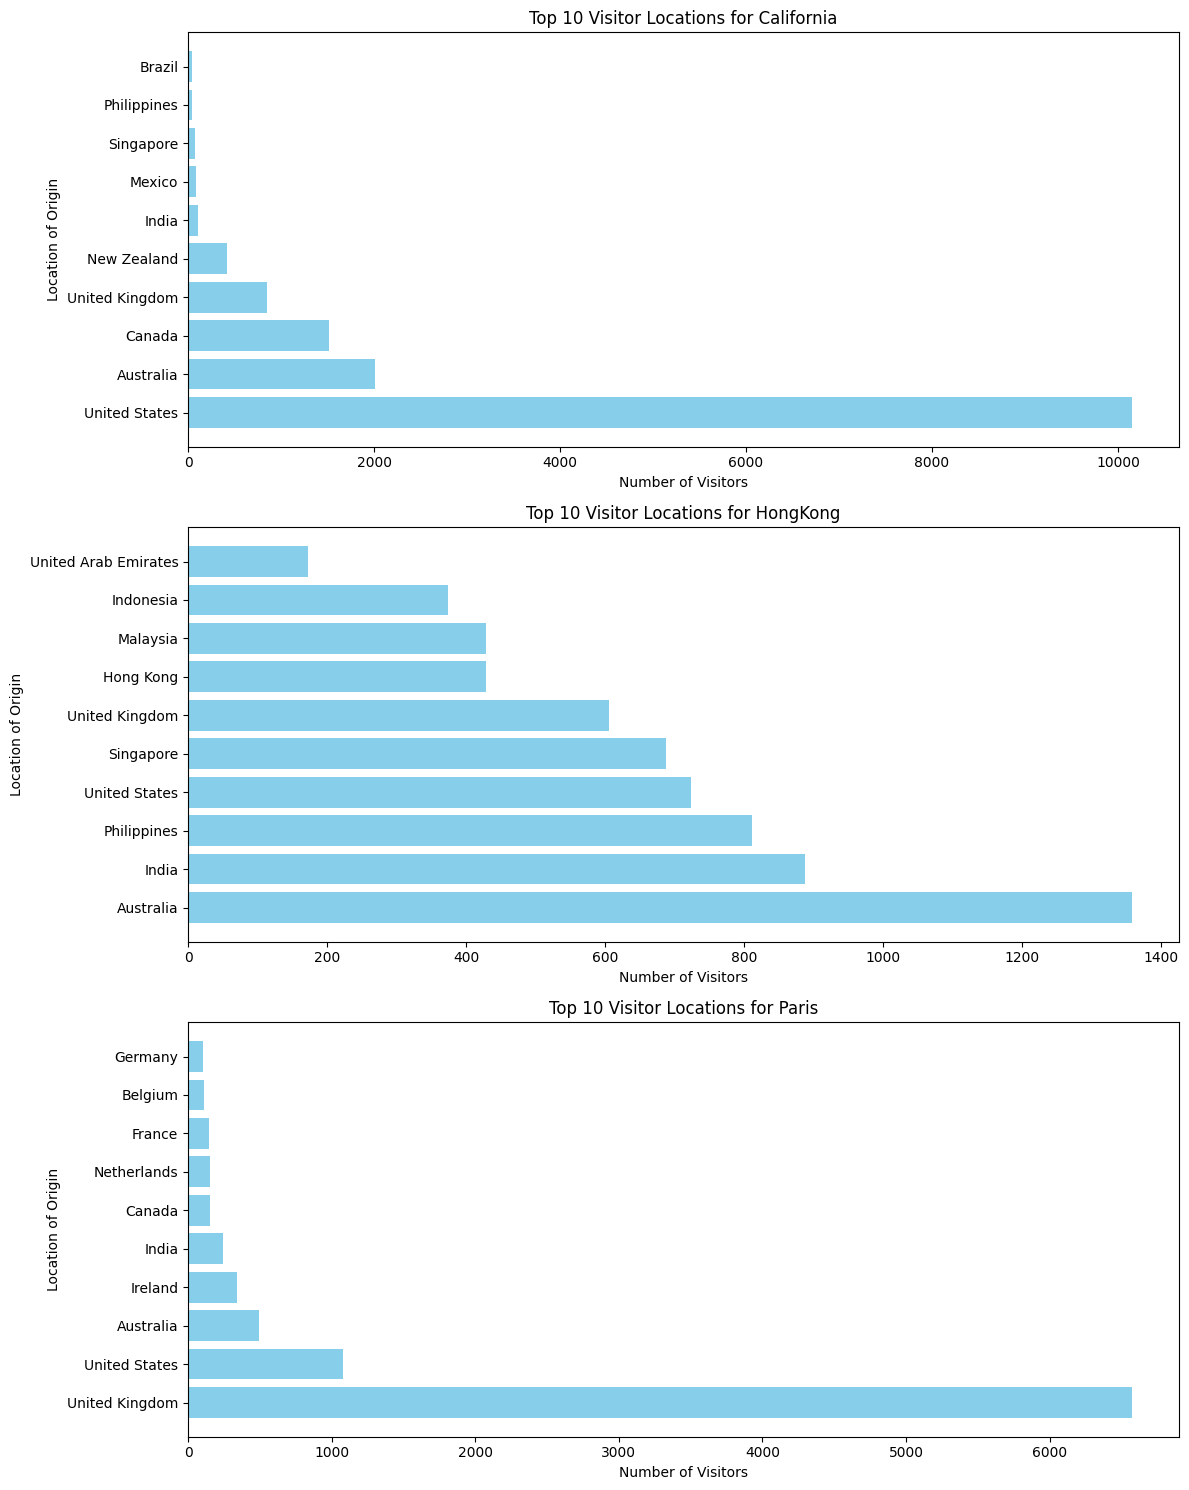

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Grouping by Branch and Reviewer_Location, and count the number of reviews
visitor_counts = df.groupby(['Branch', 'Reviewer_Location']).size().reset_index(name='Count')

# Sorting the counts in descending order
visitor_counts = visitor_counts.sort_values(by=['Branch', 'Count'], ascending=[True, False])

# the top 10 visitor locations for each branch
top_visitor_groups = visitor_counts.groupby('Branch').head(10)

# Displaying the top visitor groups
print(top_visitor_groups)

# Ploting the top visitor groups for each branch
branches = top_visitor_groups['Branch'].unique()

fig, axes = plt.subplots(nrows=len(branches), ncols=1, figsize=(12, len(branches) * 5))

for i, branch in enumerate(branches):
    ax = axes[i]
    data = top_visitor_groups[top_visitor_groups['Branch'] == branch]
    ax.barh(data['Reviewer_Location'], data['Count'], color='skyblue')
    ax.set_title(f'Top 10 Visitor Locations for {branch}')
    ax.set_xlabel('Number of Visitors')
    ax.set_ylabel('Location of Origin')

plt.tight_layout()
plt.show()

##Comparing the peak visiting times at the California branch for domestic and international visitors.

Domestic visitors peak in July (993) and October (905), driven by summer vacations and holiday periods. High numbers are also seen in June (966) and December (833). International visitors peak in July (523) with rising numbers in August and September, indicating summer travel preferences. Another smaller peak for international visitors occurs in December (531), aligning with the holiday season.

Conclusion:
Both visitor types peak in July, but domestic visitors have an additional peak in October due to local holiday patterns. International visitor patterns align with global summer travel trends and holiday seasons. These differences highlight the influence of local versus global travel behaviors on theme park visitation.

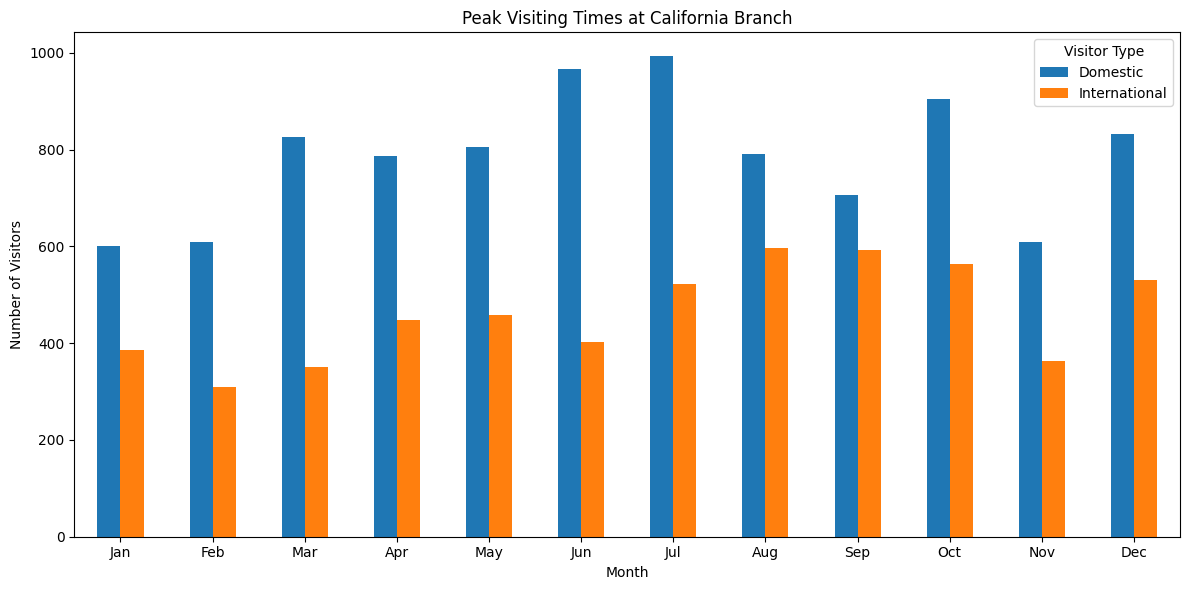

Visitor_Type  Domestic  International
Month                                
1.0                601            386
2.0                610            309
3.0                826            350
4.0                786            447
5.0                805            458
6.0                966            402
7.0                993            523
8.0                791            597
9.0                706            593
10.0               905            564
11.0               609            364
12.0               833            531


In [ ]:
# Filter for the California branch
california_df = df[df['Branch'] == 'California'].copy()

# Defining domestic and international visitors
domestic_countries = ['United States']  # Define other domestic countries if applicable
california_df.loc[:, 'Visitor_Type'] = california_df['Reviewer_Location'].apply(lambda x: 'Domestic' if x in domestic_countries else 'International')

# Handling missing or invalid date values in the Year_Month column
california_df['Year_Month'] = california_df['Year_Month'].apply(lambda x: pd.NaT if x == 'missing' else x)

# Extract the month from the Year_Month column
california_df['Month'] = pd.to_datetime(california_df['Year_Month'], errors='coerce').dt.month

# Grouping by month and visitor type, and count the number of reviews
monthly_visits = california_df.groupby(['Month', 'Visitor_Type']).size().reset_index(name='Count')

# Pivot the table for easier plotting
pivot_table = monthly_visits.pivot(index='Month', columns='Visitor_Type', values='Count').fillna(0)

# Plotting the peak visiting times
fig, ax = plt.subplots(figsize=(12, 6))

pivot_table.plot(kind='bar', ax=ax)

ax.set_title('Peak Visiting Times at California Branch')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Visitors')
ax.legend(title='Visitor Type')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

plt.tight_layout()
plt.show()

# Display the processed data
print(pivot_table)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

##Data Cleaning
We performed data cleaning on the review texts by removing non-alphabetic characters, converting text to lowercase, tokenizing, and stemming words using the PorterStemmer. Short words were removed to retain meaningful content, resulting in cleaned and standardized review texts for analysis.








In [ ]:
from nltk.stem import PorterStemmer #Stemming Package
import re  #Regular expression operation package

porter = PorterStemmer()

documents = df['Review_Text']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:
        # Noise Removal - removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # make all text lowercase
        review = review.lower()
        # applying tokenization
        Tokens = review.split()
        # applying stemming operation
        for t in range(len(Tokens)):
            Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(review)
    print('-[Review Text]: ', review)

Streaming output truncated to the last 5000 lines.
-[Review Text]:  book trip daughter myself disneyland pari could have break from stress famili bereav last time visit around year when park quit memori pretti magic sinc then have gone california park mani time alway enjoy with fairli high expect that head weekend first thing notic that clientel vastli differ from befor there were mani perfectli nice famili group from franc germani netherland seem park attract life type roam park mostli roma type their from eastern europ would question their purpos there they certainli weren there ride spot them their uniform shini puffa bomber jacket jean trainer strong cigarett smoke park usual ride fantasyland small world good probabl better than carousel snow white pinocchio were fine peter technic problem couldn head adventureland were realli disappoint that pirat caribbean close that main attract want mention anywher befor into park howev haunt mansion excel with great detail chocol cooki morn ca

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)
    print('-[Cleaned Text]: ', Cleaned_doc[r])

-[Cleaned Text]:  love christma light park crowd worst ever seen disneyland mani time experienc long wait time past visit overwhelm crowd crowd peopl park wheel chair even monitor entri park allow onli peopl time upon peopl exit light decor awesom think return dure christma holiday
-[Cleaned Text]:  sure review disneyland even point alway great coupl famili love cours
-[Cleaned Text]:  went disneyland arriv open left midnight love offer older spend time wait line meet charact fast pass make worthwhil reason park full enough wonder finish night activ miss fantast firework awesom electr parad magic disney
-[Cleaned Text]:  travel disneyland toronto decemb veri first time everyth imagin dream sinc littl girl happi final experi spent birthday boyfriend reserv birthday dinner goofi kitchen dinner buffet fill great food disney charact laughter charact entertain funni love take photo guest ride disneyland well togeth much peopl littl mermaid ride favorit sinc fave disney movi shell shape seat

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
-[Cleaned Text]:  book trip daughter disneyland pari could break stress famili bereav last time visit around year park quit memori pretti magic sinc gone california park mani time alway enjoy fairli high expect head weekend first thing notic clientel vastli differ befor mani perfectli nice famili group franc germani netherland seem park attract life type roam park mostli roma type eastern europ would question purpos certainli ride spot uniform shini puffa bomber jacket jean trainer strong cigarett smoke park usual ride fantasyland small world good probabl better carousel snow white pinocchio fine peter technic problem head adventureland realli disappoint pirat caribbean close main attract want mention anywher befor park howev haunt mansion excel great detail chocol cooki morn cabl bake shop euro heat bite cold never underestim cold bitter realli chill later chalet marionett cafe individu item instead full menu difficult usual veri much

# 3. Sentiment Analysis
Aim: The aim of the sentiment analysis is to evaluate and compare customer satisfaction levels regarding the services provided by theme park branches in California, Hong Kong, and Paris. By analyzing aspect-specific sentiments, we aim to identify which branch receives the most positive feedback for its services.


Sentiment analysis is the computational process of finding and categorizing the emotional tone expressed in a piece of text.


Lexicon based Sentiment analysis

In [ ]:
# first, we import the relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

message_text = df['Review_Text'][1]
print('Review Comment:\n', message_text)

Review Comment:
 I'm not sure reviewing Disneyland even has a point. Always a great day couple of days with the family. My kids love it, of course.


In [ ]:
#Estimate sentiment scores
scores = sid.polarity_scores(message_text)
for key in sorted(scores):
        print('{0}: {1} \n'.format(key, scores[key]), end='')
print('True Recommedation Label was: ', df['Review_Text'][1])

compound: 0.8094 
neg: 0.065 
neu: 0.661 
pos: 0.274 
True Recommedation Label was:  I'm not sure reviewing Disneyland even has a point. Always a great day couple of days with the family. My kids love it, of course.


We performed sentiment analysis using a lexicon-based approach. Sentiment scores were calculated as follows: compound score: 0.8094, negative score: 0.065, neutral score: 0.661, and positive score: 0.274. This allowed us to quantify the sentiment expressed in the review texts.

In [ ]:
#Compute Sentiment Score by text trunk
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

ReviewComment=ReviewComment.replace(',','.')
sents =  sent_tokenize(ReviewComment)
scores = []
for s in range(len(sents)):
       scores.append(sid.polarity_scores(sents[s]))
[s for s in scores] #Show sentiment score of individual trunks

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.184, 'neu': 0.816, 'pos': 0.0, 'compound': -0.2023},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.7845},
 {'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.4939},
 {'neg': 0.147, 'neu': 0.736, 'pos': 0.117, 'compound': -0.1779},
 {'neg': 0.38, 'neu': 0.62, 'pos': 0.0, 'compound': -0.5994},
 {'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.3382},
 {'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.296},
 {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.5346},
 {'neg': 0.329, 'neu': 0.671, 'pos': 0.0, 'compound': -0.5994},
 {'neg': 0.151, 'neu': 0.757, 'pos': 0.092, 'compound': -0.2244},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.421, 'neu': 0.579, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.0, 'neu

## Overall sentiments for each branch and evaluating the branch with the most positive sentiments

In [ ]:
# Calculate average sentiment for each branch
branch_sentiments = {}
for branch in df['Branch'].unique():
    branch_reviews = df[df['Branch'] == branch]['Review_Text']
    compound_scores = []
    for review in branch_reviews:
        scores = sid.polarity_scores(review)
        compound_scores.append(scores['compound'])

    average_sentiment = sum(compound_scores) / len(compound_scores)
    branch_sentiments[branch] = average_sentiment

# Find the branch with the most positive sentiment
most_positive_branch = max(branch_sentiments, key=branch_sentiments.get)

print("Average Sentiments for Each Branch:")
for branch, sentiment in branch_sentiments.items():
    print(f"{branch}: {sentiment}")

print(f"\nThe theme park with the most positive sentiments is: {most_positive_branch}")

Average Sentiments for Each Branch:
California: 0.6957583970422341
HongKong: 0.7075664087276419
Paris: 0.6433898019535766

The theme park with the most positive sentiments is: HongKong


##Theme park branch that received the most positive sentiment for their “services” - Aspect sentiment analysis


We performed a sentiment analysis to compare customer sentiments across different theme park branches using lexicon-based analysis. Each review's compound sentiment score was calculated and averaged for each branch. The results indicate the following average sentiment scores: California (0.696), HongKong (0.708), and Paris (0.643). HongKong received the most positive sentiments, with an average score of 0.708. This higher score may be due to exceptional customer experiences, superior service quality, or unique attractions at the HongKong branch, leading to more positive reviews. The analysis highlights the importance of customer satisfaction in maintaining positive sentiment.





We performed aspect sentiment analysis on reviews for theme park branches to evaluate the sentiment related to their services.

In [ ]:
#Defining a function to compute overall sentiment by aspect
def aspect_sentiment(aspect,reviewtext):
    SentimentIndex = []

    # For each review in the data set
    for rev in (reviewtext):
        try:
            sens =  sent_tokenize(rev)
        except:
            continue
        #Compute sentiment scores by each sentence.
        ReviewLevelSentiment = []
        for s in range(len(sens)):
            IndexAspect = sens[s].find(aspect)
            if IndexAspect > 0:
                ReviewLevelSentiment.append(sid.polarity_scores(sens[s]))

        #Aggregating sentiment scores for each review
        try:
            Compound = mean([ReviewLevelSentiment[x]['compound'] for x in range(len(ReviewLevelSentiment))])
        except:
            Compound = 0

        # Generating sentiment index based on sentiment score
        SentimentIndex.append(Compound)

         # Define thresholds
        positive_threshold = 0.1
        negative_threshold = -0.1

        # Initialize counters
        positive_count = 0
        negative_count = 0

        for value in SentimentIndex:
            if value > positive_threshold:
                positive_count += 1
            elif value < negative_threshold:
                negative_count += 1
        Total_Count = positive_count + negative_count
    return [round(positive_count/Total_Count,2), round(negative_count/Total_Count,2)]

In [ ]:
#Defining Aspects to compute sentiment
aspects = ['services']

#Extracting Reviews for Californias only and compute aspect sentiments
print('Sentiment scores for California:')
CaliforniaReviews = df.loc[df['Branch'] == 'California']
SentimentScoresCalifornia = []
for a in range(len(aspects)):
    SentimentScoresCalifornia.append(aspect_sentiment(aspects[a],CaliforniaReviews['Review_Text']))
    print(aspects[a])
    print(SentimentScoresCalifornia[a])

print('--------------------------------')
#Extracting Reviews for HongKong only and compute aspect sentiments
print('Sentiment scores for HongKong:')
HongKongReviews = df.loc[df['Branch'] == 'HongKong']
SentimentScoresHongKong = []
for a in range(len(aspects)):
    SentimentScoresHongKong.append(aspect_sentiment(aspects[a],HongKongReviews['Review_Text']))
    print(aspects[a])
    print(SentimentScoresHongKong[a])

print('--------------------------------')
#Extracting Reviews for Paris only and compute aspect sentiments
print('Sentiment scores for Paris:')
ParisReviews = df.loc[df['Branch'] == 'Paris']
SentimentScoresParis = []
for a in range(len(aspects)):
    SentimentScoresParis.append(aspect_sentiment(aspects[a],ParisReviews['Review_Text']))
    print(aspects[a])
    print(SentimentScoresParis[a])

Sentiment scores for California:
services
[0.79, 0.21]
--------------------------------
Sentiment scores for HongKong:
services
[0.75, 0.25]
--------------------------------
Sentiment scores for Paris:
services
[0.7, 0.3]


Based on the sentiment analysis of reviews for theme park branches in California, Hong Kong, and Paris, it is evident that the California branch received the most positive sentiment regarding their services. The sentiment scores are as follows: California scored 0.79 in positive sentiment, Hong Kong scored 0.75, and Paris scored 0.7. This analysis indicates that visitors to the California branch were the most satisfied with the services provided. The higher positive sentiment score for California suggests that its services are perceived as superior compared to the other branches. Therefore, California stands out as the branch with the most favorable service reviews among the three locations. Furthermore, we have bar chart to present the same

Text(0.5, 0.98, 'Positive Sentiment')

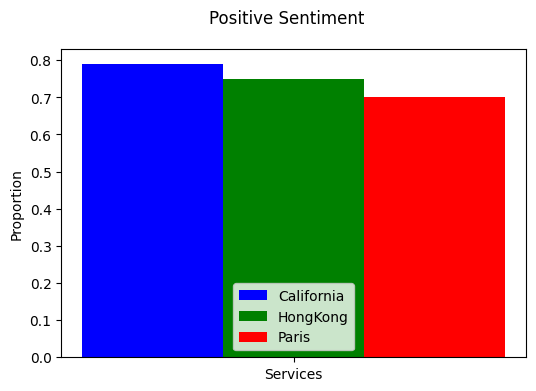

In [ ]:
#Plotting the Positive sentiment scores on a bar chart
import numpy
from matplotlib import pyplot

PositiveCalifornia = [SentimentScoresCalifornia[x][0] for x in range(len(SentimentScoresCalifornia))]
PositiveHongKong = [SentimentScoresHongKong[x][0] for x in range(len(SentimentScoresHongKong))]
PositiveParis = [SentimentScoresParis[x][0] for x in range(len(SentimentScoresParis))]

aspects = ['Services']

ind = numpy.arange(len(aspects))  # the x locations for the groups
width = 0.27       # the width of the bars

# Plot figure for positive reviews
figPo = pyplot.figure(figsize=(6, 4))
ax = figPo.add_subplot(111)

rectsPositiveCalifornia = ax.bar(ind, PositiveCalifornia, width, color='b')
rectsPositiveHongKong = ax.bar(ind+width, PositiveHongKong, width, color='g')
rectsPositiveParis = ax.bar(ind+2*width, PositiveParis, width, color='r')

ax.set_ylabel('Proportion')
ax.set_xticks(ind + width)
ax.set_xticklabels(aspects)
ax.legend((rectsPositiveCalifornia[0], rectsPositiveHongKong[0], rectsPositiveParis[0]), ('California', 'HongKong', 'Paris'), loc='lower center')
pyplot.suptitle('Positive Sentiment')


# 4. Topic Modeling - Latent Dirichlet Allocation
**Aim** : The aim of LDA modeling is to uncover hidden thematic structures in the review data by identifying distinct topics and their distributions. This helps in understanding the primary concerns and interests of customers visiting the theme parks.


Latent Dirichlet Allocation (LDA) is a generative statistical model used to identify and categorize topics within a collection of documents based on word distributions.

To build the LDA model, we started by processing the review texts, extracting the 40 most common words to identify frequent terms. Using the code provided, we visualized these words and their counts. Recognizing that words like "park," "ride," and "disneyland" were overly common and non-informative for topic discovery, we implemented term selection. This involved extracting nouns and filtering out both highly frequent and infrequent terms. As a result, we retained 1688 relevant terms. This preprocessing step ensured that the LDA model would effectively identify meaningful topics from the review data, enhancing our analysis of customer feedback.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

<35000x22878 sparse matrix of type '<class 'numpy.int64'>'
	with 1551294 stored elements in Compressed Sparse Row format>

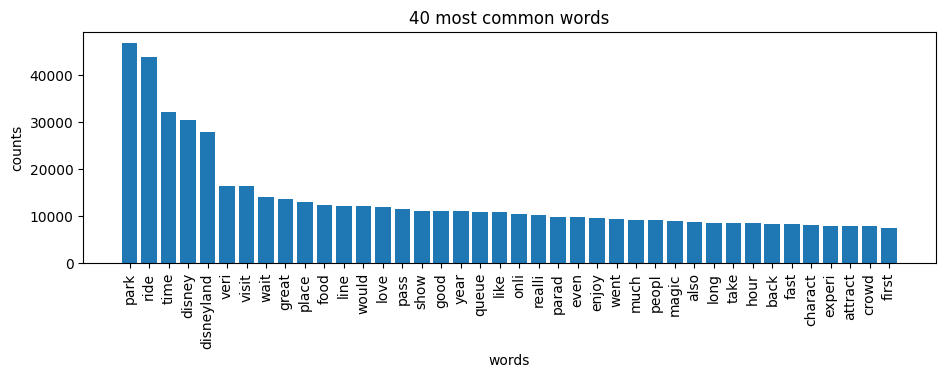

In [ ]:
terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(2, figsize=(11, 3))
plt.subplot(title='40 most common words')
plt.bar(words, counts)
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

##Term Selection

Highly frequent words like "park," "ride," and "disneyland" do not aid in topic discovery since they are common in most reviews. These overly frequent words should be discarded. Additionally, infrequent words that appear only a few times in the entire dataset should also be removed, as they offer little value.

In [ ]:

import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Function to extract nouns from text
def extract_nouns(text):
    words = word_tokenize(text)
    words_pos = pos_tag(words)
    nouns = [word for word, pos in words_pos if pos.startswith('NN')]
    return ' '.join(nouns)

# Apply the function to the review text1
df['Nouns_Only'] = df['Review_Text'].apply(extract_nouns)

# Display the first few rows to ensure the nouns extraction is correct
df[['Review_Text', 'Nouns_Only']].head()

Review_Text  \
0  Loved seeing the Christmas lights at the park, but the crowds were the worst we had ever seen. We have been to Disneyland many times and have experienced long wait times in the past, but this visi...   
1                                                                       I'm not sure reviewing Disneyland even has a point. Always a great day couple of days with the family. My kids love it, of course.   
2  Went to Disneyland for one day. We arrive at opening and left at midnight. We loved all it had to offer. My kids are older so we did not spend time waiting in line to meet characters. Use the fast...   
3  I travelled to Disneyland from Toronto in December 2015 for the very first time. It was EVERYthing that you can imagine. I've dreamed about that day since I was a little girl and was so happy I go...   
4  This place might be ok for families with kids. My wife and I went to remember our past experiences when things were much less expensive. The park is packed with guests and hard to navigate. Prices...   

                                                                                                                                                                                                Nouns_Only  
0                                   Christmas lights park crowds Disneyland times times visit crowds crowds people parking wheel chairs entry park people time people lights decorations Christmas holiday  
1                                                                                                                                                      Disneyland point day couple days family kids course  
2                                                        Went Disneyland day opening midnight kids time line characters passes day reason parks Day way day night activities fireworks parade magic Disney  
3  Disneyland Toronto December time day girl Birthday boyfriend reservations Birthday Dinner Goofy Kitchen dinner buffet food Disney characters fun laughter characters juts photos guests.The rides Di...  
4                                                    place families kids wife experiences things park guests Prices food parking entrance fees value kids experience bit attractions repair advance notice

In [ ]:
# Vectorize the noun-only text data
vectorizer = CountVectorizer(stop_words='english')
data_vectorized = vectorizer.fit_transform(df['Nouns_Only'])

# Get the total counts of words
total_counts = np.asarray(data_vectorized.sum(axis=0)).flatten()
terms = vectorizer.get_feature_names_out()


In [ ]:
#Removing highly frequent (Greater than 20%) and infrequent words (less than 1%)
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 1000 and total_counts[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = data_vectorized[:,keepIndex]
ReducedCount

Number of Terms Remained:  1688


<35000x1688 sparse matrix of type '<class 'numpy.int64'>'
	with 318983 stored elements in Compressed Sparse Row format>

##LDA Modeling


##Experiment with Topic Numbers
Constructing multiple LDA modles with varied numbers of topics and evaluate their coherence score.

In [ ]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,11,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keeping the trained models
    Trained_Models.append(lda_model)
    #Computing coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.7248823689270462
Topic Number: 3 -- Coherence: 0.7144007809946992
Topic Number: 4 -- Coherence: 0.7135729250767753
Topic Number: 5 -- Coherence: 0.7189570988298731
Topic Number: 6 -- Coherence: 0.7132335046614467
Topic Number: 7 -- Coherence: 0.7244440252522415
Topic Number: 8 -- Coherence: 0.7204545731301549
Topic Number: 9 -- Coherence: 0.704844249404617
Topic Number: 10 -- Coherence: 0.7121500287774262


We experimented with LDA models, evaluating coherence scores for 2 to 10 topics. With the second-highest coherence score of 0.7244, 7 topics were selected as optimal, balancing coherence and interpretability, whereas 2 topics were too few to provide meaningful insights.








#Number of topics - 7
Chosing the most ideal topic numbers as 7 and training a model on that

##What are the concerns or interests of customers when visiting the theme parks?

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 7

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[ 0.1431428 , 10.78422627,  0.15050818, ..., 74.92972112,
         6.81601905,  0.14302401],
       [ 1.05400619, 23.83496371,  3.70231146, ...,  0.14329842,
         0.1430794 ,  1.3160524 ],
       [ 5.23857765,  0.14332655, 14.63528622, ..., 34.80090111,
        32.95144348,  0.14294942],
       ...,
       [17.87727307, 46.34702555,  0.16534878, ...,  5.65845188,
         8.04695834,  0.23245483],
       [10.16683135, 20.60398727, 21.87300069, ..., 15.12100216,
        15.76088941,  0.14327062],
       [33.45411768,  0.1432852 , 37.33048567, ..., 25.35988664,
         0.59115918, 58.50238846]])

###Word Probabilities by Topic

In [ ]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[2.35466272e-06 1.77397788e-04 2.47582135e-06 ... 1.23257491e-03
  1.12121785e-04 2.35270873e-06]
 [3.05611201e-05 6.91099536e-04 1.07349261e-04 ... 4.15496639e-06
  4.14861577e-06 3.81592024e-05]
 [1.06032916e-04 2.90104163e-06 2.96229660e-04 ... 7.04397504e-04
  6.66963033e-04 2.89340818e-06]
 ...
 [3.30486667e-04 8.56790291e-04 3.05670598e-06 ... 1.04604483e-04
  1.48759401e-04 4.29725609e-06]
 [1.88202852e-04 3.81409806e-04 4.04901092e-04 ... 2.79911768e-04
  2.91757013e-04 2.65214783e-06]
 [6.66803417e-04 2.85594317e-06 7.44066714e-04 ... 5.05470185e-04
  1.17829132e-05 1.16606251e-03]]


These were the words that we obtained in each topic:

In [ ]:
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
bus : 0.013
tower : 0.011
meet : 0.009
terror : 0.009
dreams : 0.009

Topic #1:
new : 0.026
wdw : 0.021
atmosphere : 0.019
dream : 0.018
ca : 0.016

Topic #2:
mtr : 0.017
lion : 0.016
king : 0.016
grizzly : 0.013
toy : 0.013

Topic #3:
school : 0.014
holidays : 0.013
la : 0.011
hopper : 0.010
advantage : 0.008

Topic #4:
customer : 0.013
member : 0.012
memories : 0.011
friends : 0.011
parents : 0.009

Topic #5:
ice : 0.011
entry : 0.011
car : 0.009
security : 0.009
meals : 0.009

Topic #6:
splash : 0.017
matterhorn : 0.014
haunted : 0.014
party : 0.014
tours : 0.014


In [ ]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

ability  absolute   academy    access  accommodation   account       act  \
0  0.000002  0.000177  0.000002  0.002121       0.001630  0.000074  0.000002   
1  0.000031  0.000691  0.000107  0.000993       0.000004  0.000004  0.000117   
2  0.000106  0.000003  0.000296  0.001536       0.000003  0.000003  0.000003   
3  0.000583  0.000003  0.000003  0.003559       0.000073  0.000344  0.000003   
4  0.000330  0.000857  0.000003  0.001289       0.000003  0.000279  0.000603   
5  0.000188  0.000381  0.000405  0.003297       0.000268  0.000341  0.000315   
6  0.000667  0.000003  0.000744  0.003739       0.000005  0.000060  0.000158   

     action  activities  activity  ...       yes  yesterday        yo  \
0  0.000801    0.000002  0.000002  ...  0.001199   0.000003  0.000041   
1  0.000188    0.010102  0.001177  ...  0.000519   0.000372  0.000408   
2  0.000267    0.001329  0.000600  ...  0.000132   0.000111  0.000712   
3  0.000142    0.000018  0.000003  ...  0.000463   0.000003  0.000055   
4  0.000936    0.000010  0.000074  ...  0.000638   0.001739  0.000003   
5  0.001235    0.000021  0.000474  ...  0.000122   0.000045  0.000005   
6  0.000339    0.000003  0.000316  ...  0.000034   0.000018  0.000339   

       york     young        yr       yrs      zone     zones       zoo  
0  0.000575  0.000002  0.000752  0.000616  0.001233  0.000112  0.000002  
1  0.004986  0.000986  0.000760  0.000109  0.000004  0.000004  0.000038  
2  0.000003  0.000003  0.000130  0.000509  0.000704  0.000667  0.000003  
3  0.000003  0.000084  0.001113  0.000747  0.000019  0.000207  0.000146  
4  0.000003  0.000230  0.000458  0.000484  0.000105  0.000149  0.000004  
5  0.000342  0.000014  0.000678  0.000199  0.000280  0.000292  0.000003  
6  0.000003  0.000003  0.000297  0.000003  0.000505  0.000012  0.001166  

[7 rows x 1688 columns]

###Visualize the word clouds for the topics generated by LDA

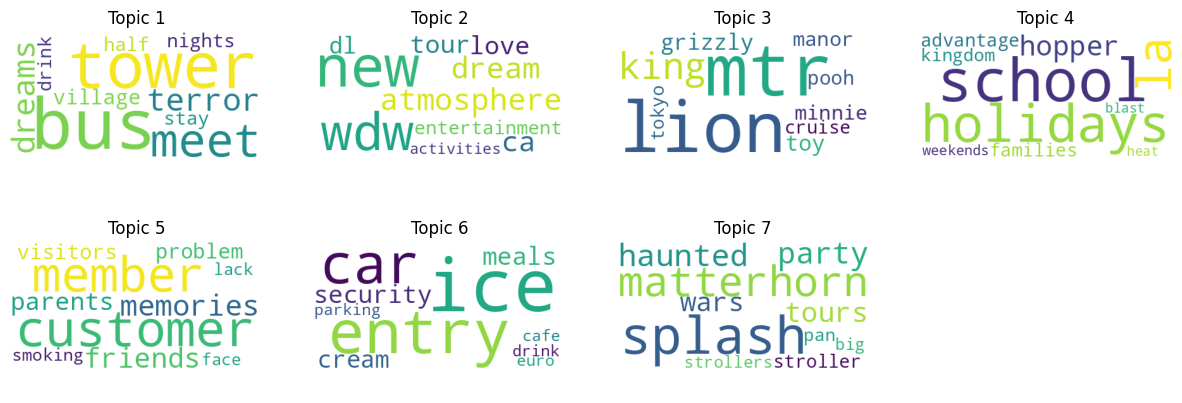

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import math
import matplotlib.pyplot as pyplot

rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))

# Handle the case of a single row of subplots
if rows == 1:
    ax = ax.ravel()  # Flatten the array when there's only one row
else:
    ax = ax.ravel()  # Flatten the array for multiple rows

[axi.set_axis_off() for axi in ax]  # Turn off axes for all subplots

for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_idx = topic_idx  # Use a single index for 1D array
    ax[subfig_idx].imshow(wordcloud)  # Index as a 1D array
    ax[subfig_idx].set_title("Topic {}".format(topic_idx+1))
plt.show()

After performing topic modeling, the word clouds generated for each topic reveal the primary concerns and interests of customers when visiting the theme parks. Here are the insights from each topic:

**Topic 1:** Concerns related to "tower," "bus," and "meet" suggest logistical aspects such as transportation and gathering points.


**Topic 2:** Keywords like "new," "atmosphere," and "dream" indicate a focus on the overall experience and ambiance.


**Topic 3**: The presence of "king," "lion," and "mountain" reflects interests in specific attractions and themed areas.


**Topic 4:** Words such as "school," "holidays," and "families" highlight the timing of visits and family-oriented activities.


**Topic 5:** Terms like "visitors," "problem," and "member" suggest concerns about membership benefits and potential issues faced by visitors.


**Topic 6:** Keywords "car," "ice," and "entry" indicate practical concerns about parking, refreshments, and park entry.


**Topic 7:** Words like "haunted," "party," and "splash" point to interests in specific events and water attractions.


**These topics provide a comprehensive understanding of what customers care about most during their visits to the theme parks.**

Computer the popularity of topics over the entire data set to identify the most popular topics.

In [ ]:
#Compute topic distribution for each document
TopicDis_Doc = lda.transform(ReducedCount)

#Compute overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

array([0.13371476, 0.13188273, 0.13847388, 0.17305702, 0.16924643,
       0.12078849, 0.13283669])

Visualize the topic distribution using bar chart

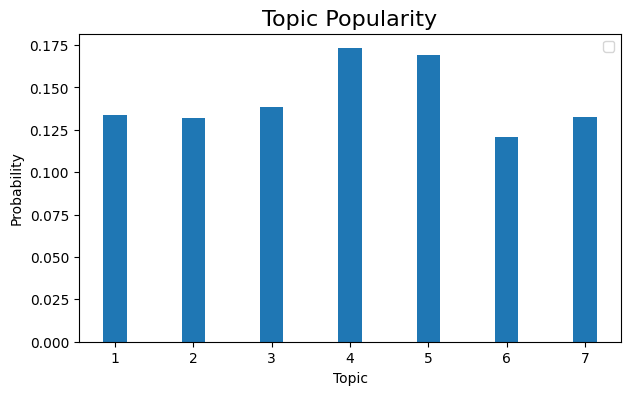

In [ ]:
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Visualize topic distributions of review groups
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Popularity', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
pyplot.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
pyplot.xticks(Bar_index, Bar_index)
pyplot.legend()
pyplot.show();

Additionally, Topic 4 emerged as the most popular, indicating that timing and family activities are top priorities for visitors. The popularity distribution of topics underscores the varied aspects of customer experiences and priorities.

###  Topic Probabilities by Document

Compute the topic distribution for individual documents:

In [ ]:
# View full Topic Probabilities by Document Matrix
TopicDis_Doc = lda.transform(ReducedCount)
df_document_topics = pd.DataFrame(TopicDis_Doc)
df_document_topics

0         1         2         3         4         5         6
0      0.017908  0.017935  0.017937  0.017929  0.017908  0.018063  0.892321
1      0.142857  0.142857  0.142857  0.142857  0.142857  0.142857  0.142857
2      0.023845  0.422756  0.023861  0.457870  0.023909  0.023866  0.023893
3      0.106053  0.619762  0.253693  0.005128  0.005121  0.005121  0.005121
4      0.014316  0.014309  0.014298  0.640594  0.287783  0.014357  0.014344
...         ...       ...       ...       ...       ...       ...       ...
34995  0.017935  0.017887  0.017915  0.017907  0.162658  0.017925  0.747771
34996  0.020600  0.020534  0.020461  0.020517  0.876998  0.020420  0.020469
34997  0.294268  0.267556  0.007975  0.007965  0.406313  0.007952  0.007970
34998  0.047775  0.047639  0.047635  0.047663  0.047836  0.047699  0.713753
34999  0.028657  0.028599  0.028604  0.028627  0.341832  0.515083  0.028598

[35000 rows x 7 columns]

Topic Probablity distribution by Document: 
 [[0.0179076  0.01793525 0.01793708 0.01792866 0.01790819 0.01806259
  0.89232063]
 [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714]
 [0.02384477 0.42275582 0.02386067 0.45787045 0.02390882 0.0238661
  0.02389337]
 [0.10605311 0.6197623  0.25369293 0.0051284  0.00512107 0.00512112
  0.00512108]
 [0.01431557 0.01430907 0.01429752 0.64059444 0.28778265 0.01435701
  0.01434373]]


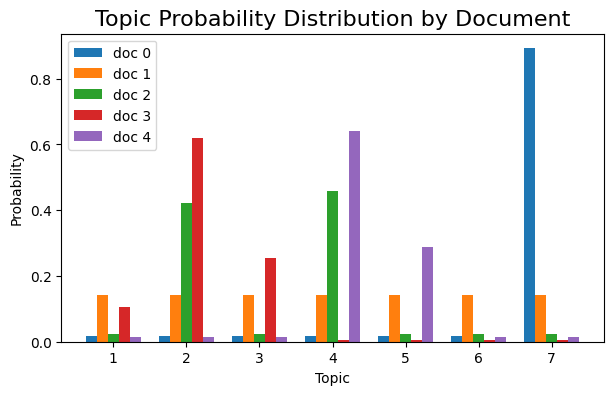

In [ ]:
# Compute the topic distribution for some reviews:
TopicDis_Doc = TopicDis_Doc[0:5]
print('Topic Probablity distribution by Document: \n', TopicDis_Doc)
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Probability Distribution by Document', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(0,5):
    pyplot.bar(Bar_index + i*width, TopicDis_Doc[i].tolist(), width,  label='doc ' + str(i))

pyplot.xticks(Bar_index + 2*width, Bar_index)
pyplot.legend()
pyplot.show();
#NOTE: Different Run may result in Different Graph
#due to the Randomization when training the LDA model

##Differences in concerns and interests between visitors from the United States and the United Kingdom when visiting the theme parks?

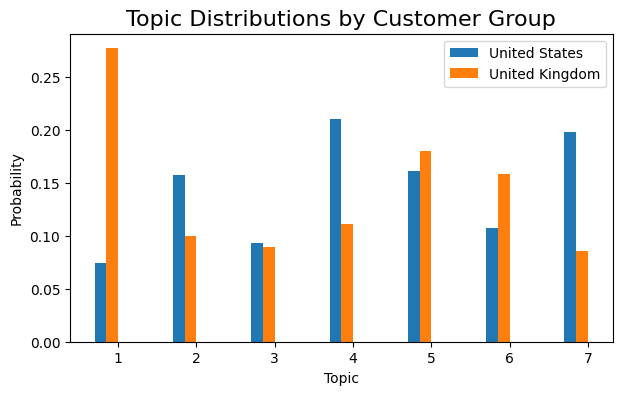

In [ ]:
import numpy as np


Selected_Countries = ['United States', 'United Kingdom']

Group_Prob = []
for i in range(len(Selected_Countries)):
    ReducedTerm_Selected = ReducedCount[np.where(df['Reviewer_Location'] == Selected_Countries[i])]
    TopicDis_Doc = lda.transform(ReducedTerm_Selected)
    Group_Prob.append(sum(TopicDis_Doc)/sum(sum(TopicDis_Doc)))


#Create a new figure
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Distributions by Customer Group', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')

width = 0.15
for i in range(len(Selected_Countries)):
    pyplot.bar(Bar_index + i*width, Group_Prob[i].tolist(), width,  label=Selected_Countries[i])

pyplot.xticks(Bar_index + 1.5*width, Bar_index)
pyplot.legend()
pyplot.show();


The analysis of topic distributions by customer group reveals distinct differences in concerns and interests between visitors from the United States and the United Kingdom. Visitors from the United Kingdom have a higher probability of concerns related to logistical aspects (Topic 1), indicating a focus on transportation and gathering points. In contrast, visitors from the United States show a higher probability in overall experience and ambiance (Topic 2) and specific attractions (Topic 4). These differences may stem from varying travel experiences and cultural preferences, with UK visitors potentially prioritizing efficient travel logistics and US visitors emphasizing the immersive experience and diverse attractions.

In [ ]:
#installing Gensim package

!pip install Cython
!pip install gensim

Data Preperation

In [ ]:
Cleaned_doc_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)
    print(Cleaned_doc_new[r])

Streaming output truncated to the last 5000 lines.
['stress', 'enjoy', 'head', 'nice', 'group', 'type', 'type', 'question', 'spot', 'jacket', 'smoke', 'fantasyland', 'small', 'good', 'better', 'carousel', 'snow', 'white', 'pinocchio', 'fine', 'problem', 'head', 'adventureland', 'disappoint', 'close', 'mention', 'shop', 'euro', 'heat', 'bite', 'cold', 'cold', 'later', 'cafe', 'item', 'menu', 'burger', 'nugget', 'work', 'group', 'later', 'long', 'cold', 'left', 'head', 'shop', 'stand', 'right', 'close', 'drink', 'check', 'card', 'cash', 'jacket', 'hall', 'hell', 'airport', 'sandwich']
['felt', 'vibe', 'wonder', 'feel', 'boyfriend', 'twice', 'watch', 'firework', 'wonder', 'music', 'feel', 'music', 'feel', 'light', 'walk', 'walk', 'feel', 'site', 'feel', 'dream', 'wonder', 'heart']
['mind', 'past', 'enjoy', 'small', 'face', 'french', 'beast', 'nice', 'small', 'nice', 'help', 'clean', 'rope', 'bathroom', 'glad', 'went', 'gate']
['french', 'took', 'half']
['guess']
['went', 'stay', 'santa', 

Next, construct a term dictionary following required format of LDA module in gensim library:

In [ ]:
import gensim.corpora as corpora

# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)
print(id2word.token2id)

{'chair': 0, 'decor': 1, 'exit': 2, 'light': 3, 'long': 4, 'love': 5, 'past': 6, 'return': 7, 'think': 8, 'wheel': 9, 'review': 10, 'sure': 11, 'firework': 12, 'left': 13, 'make': 14, 'meet': 15, 'midnight': 16, 'miss': 17, 'offer': 18, 'reason': 19, 'went': 20, 'wonder': 21, 'boyfriend': 22, 'bring': 23, 'buffet': 24, 'come': 25, 'diamond': 26, 'dream': 27, 'feel': 28, 'girl': 29, 'guest': 30, 'hopper': 31, 'kitchen': 32, 'look': 33, 'mermaid': 34, 'music': 35, 'play': 36, 'recommend': 37, 'scene': 38, 'shape': 39, 'spent': 40, 'travel': 41, 'work': 42, 'better': 43, 'close': 44, 'good': 45, 'grand': 46, 'hard': 47, 'pack': 48, 'premium': 49, 'repair': 50, 'action': 51, 'best': 52, 'dole': 53, 'gate': 54, 'hand': 55, 'help': 56, 'idea': 57, 'luck': 58, 'need': 59, 'small': 60, 'spot': 61, 'stand': 62, 'start': 63, 'tiki': 64, 'view': 65, 'walk': 66, 'whip': 67, 'word': 68, 'comment': 69, 'nice': 70, 'friend': 71, 'happiest': 72, 'alot': 73, 'cali': 74, 'came': 75, 'comparison': 76, 'd

Converting `Cleaned_doc_new` into bag of word representation based on the computed dictionary `id2word`. The presentation is in (Term Index, Frequency) format.

In [ ]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]
print(Corpus[0:5])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(5, 1), (10, 1), (11, 1)], [(5, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(1, 1), (5, 1), (12, 1), (14, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(6, 1), (20, 1), (30, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)]]


#Gensim LDA Model

In [ ]:
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=7,
                                       random_state=100)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.063*"firework" + 0.056*"went" + 0.048*"stay" + 0.038*"good" + '
  '0.032*"worth" + 0.029*"recommend" + 0.025*"love" + 0.024*"enjoy" + '
  '0.020*"light" + 0.019*"best"'),
 (1,
  '0.040*"make" + 0.032*"drink" + 0.029*"need" + 0.024*"good" + 0.023*"sure" + '
  '0.022*"bring" + 0.020*"walk" + 0.019*"french" + 0.015*"stay" + '
  '0.015*"shop"'),
 (2,
  '0.145*"love" + 0.043*"dream" + 0.036*"meet" + 0.032*"come" + 0.025*"clean" '
  '+ 0.025*"help" + 0.024*"wonder" + 0.022*"enjoy" + 0.018*"worth" + '
  '0.017*"make"'),
 (3,
  '0.025*"push" + 0.024*"rude" + 0.024*"start" + 0.017*"close" + 0.016*"stand" '
  '+ 0.014*"disappoint" + 0.014*"walk" + 0.014*"long" + 0.013*"went" + '
  '0.013*"nice"'),
 (4,
  '0.052*"close" + 0.030*"good" + 0.019*"stay" + 0.016*"small" + 0.016*"walk" '
  '+ 0.014*"went" + 0.013*"disappoint" + 0.012*"half" + 0.012*"better" + '
  '0.012*"studio"'),
 (5,
  '0.059*"smoke" + 0.037*"long" + 0.036*"meet" + 0.033*"good" + 0.024*"better" '
  '+ 0.023*"avoid" + 0.023

Computing coherence score

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score. Note: that CoherenceModel require
# text input format (Cleaned_doc_new) instead of bag of word
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=Cleaned_doc_new,
                                     dictionary=id2word,
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.7244440252522415



The coherence score of 0.7244 for the model with 7 topics indicates a high level of interpretability and semantic consistency among the topics. This score suggests that the topics generated by the model are well-defined and meaningful, making 7 an optimal number of topics for analyzing the review data.

In [ ]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,11,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keeping the trained models
    Trained_Models.append(lda_model)
    #Computing coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.7248823689270462
Topic Number: 3 -- Coherence: 0.7144007809946992
Topic Number: 4 -- Coherence: 0.7135729250767753
Topic Number: 5 -- Coherence: 0.7189570988298731
Topic Number: 6 -- Coherence: 0.7132335046614467
Topic Number: 7 -- Coherence: 0.7244440252522415
Topic Number: 8 -- Coherence: 0.7204545731301549
Topic Number: 9 -- Coherence: 0.704844249404617
Topic Number: 10 -- Coherence: 0.7121500287774262


Plotting the coherence scores for the ease of interpretation. The desired topic number is the one that produce highest coherence score.

Text(0, 0.5, 'Coherence')

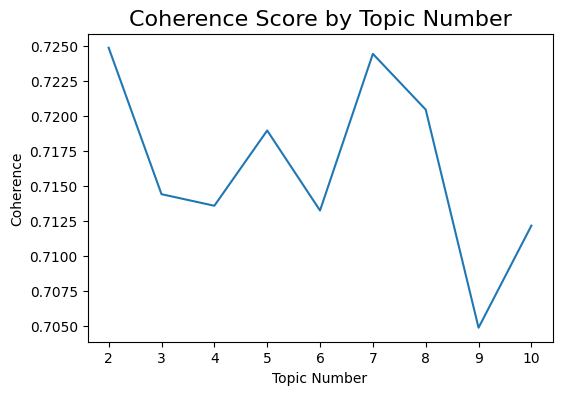

In [ ]:
pyplot.figure(figsize=(6,4))
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

#The Best Model
Extracting and analyzing the best LDA model.

In [ ]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]

#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(0,
  '0.047*"love" + 0.035*"good" + 0.034*"went" + 0.032*"enjoy" + 0.024*"firework" + 0.024*"stay" + 0.021*"worth" + 0.021*"long" + 0.017*"meet" + 0.016*"recommend"'),
 (1,
  '0.023*"close" + 0.019*"make" + 0.018*"good" + 0.017*"need" + 0.017*"walk" + 0.014*"euro" + 0.013*"long" + 0.013*"look" + 0.013*"come" + 0.011*"disappoint"')]

#Practical Implication


Based on the insights from our analysis, we recommend the following actions to better support customers at theme parks:

1. Peak Times: we can enhance staffing and resource allocation during peak months (July and December) to ensure smooth operations. Moreover, we can implement virtual queueing systems that allow visitors to reserve their spot in line via a mobile app, reducing physical wait times and enabling guests to enjoy other attractions or amenities while they wait.

2. Enhance Transportation and Logistics: For visitors from the United Kingdom, focus on improving transportation services and providing clear signage and maps. Introduce a comprehensive, on-demand shuttle service within the park and to nearby hotels and transportation hubs.

3. Cultural Tailoring in Marketing: Adapt marketing and service offerings to align with local preferences. For example, emphasize regional attractions and amenities in promotional campaigns aimed at specific geographic areas. This approach enhances relevance and engagement with the target audience.

4. Customer feedback: We can continuously collect and evaluate visitor feedback to remain responsive to changing preferences and concerns. Establish real-time feedback systems to promptly address any issues that arise, ensuring a better visitor experience.

5. Interactive Family Zones: Create interactive, technology-enhanced family zones where parents and children can participate in activities together. These zones could feature AR games, interactive storytelling, and live character interactions to provide memorable family experiences.

6. Personalized Experience Platforms: Develop an app that leverages artificial intelligence to offer personalized itineraries. The app could suggest attractions, dining options, and shows based on the visitor's interests and past behavior, ensuring a tailored and engaging experience.




#Reference list

admin (2024). Unlocking Global Markets: Multicultural Marketing Strategies. [online] Programmatic Marketing | Multicultural Marketing. Available at: https://www.isearchmarketing.com.au/unlocking-global-markets-multicultural-marketing-strategies/ [Accessed 7 Aug. 2024].

Kezia Grace Jungco (2024). What Is Sentiment Analysis? Essential Guide. [online] Datamation. Available at: https://www-datamation-com.translate.goog/trends/sentiment-analysis/?_x_tr_hl=id&_x_tr_pto=rq&_x_tr_sl=en&_x_tr_tl=id [Accessed 7 Aug. 2024].

Navigate (2023). How to Use Visitor Feedback as a Marketing Goldmine. [online] Navigate. Available at: https://www.navigate.agency/blog/how-to-use-visitor-feedback/ [Accessed 7 Aug. 2024].

Olohijere, F. (2024). The Power of Personalizing User Experience. [online] Medium. Available at: https://uxplanet.org/the-power-of-personalizing-user-experience-a88e2f3bee29.

Wikipedia Contributors (2019). Latent Dirichlet allocation. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation